In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

In [2]:
data = pd.read_csv('Training.csv')

In [3]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
data = data.dropna(axis=1)

In [5]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
z = data.iloc[: , -1]

In [7]:
z.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: object

In [8]:
disease_counts = z.value_counts().reset_index()
disease_counts.columns = ['Disease', 'Counts']

In [9]:
disease_counts.head()

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120


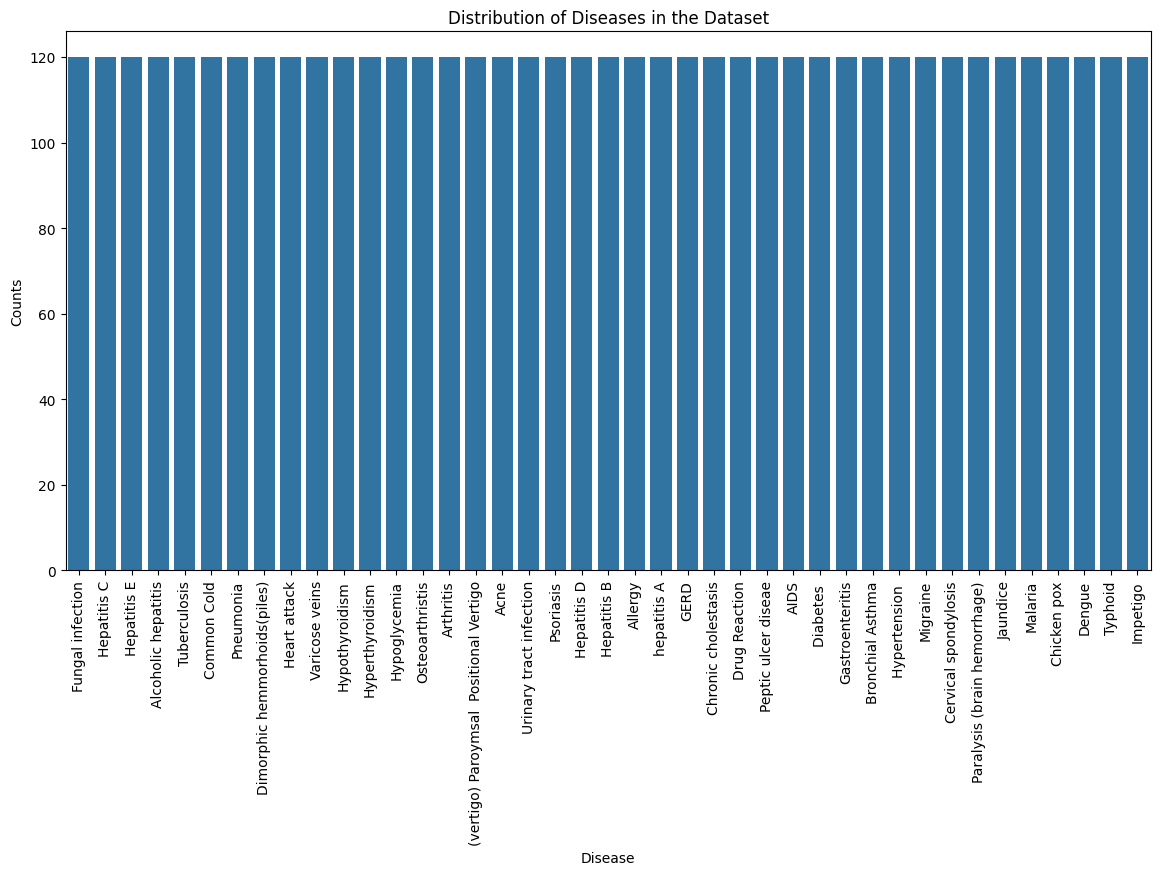

In [33]:
plt.figure(figsize=(14, 7))  
sns.barplot(x='Disease', y='Counts', data=disease_counts  )
plt.xticks(rotation=90)
plt.title('Distribution of Diseases in the Dataset')
plt.xlabel('Disease')
plt.ylabel('Counts')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 
data["prognosis"] = encoder.fit_transform(data["prognosis"]) 

In [12]:
X = data.iloc[:,:-1]
y = data.iloc[: , -1]

In [13]:
X_train , X_test , y_train ,  y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1)

In [14]:
print(X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape)

(3444, 132) (1476, 132) (3444,) (1476,)


In [15]:
svm = SVC()
svm.fit(X_train , y_train)
svm_pred = svm.predict(X_test)
print(classification_report(y_test , svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        35
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        41
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00        34
          17       1.00    

In [16]:
nb = GaussianNB()
nb.fit(X_train , y_train)
nb_pred = nb.predict(X_test)
print(classification_report(y_test , nb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        35
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        41
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00        34
          17       1.00    

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test , rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        35
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        41
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00        34
          17       1.00    

In [18]:
svm_pred

array([38, 17, 26, ...,  0,  6, 34])

In [19]:
y_test

2025    38
1724    17
4500    26
2213     8
4604     7
        ..
1533    39
936     30
3111     0
3658     6
4537    34
Name: prognosis, Length: 1476, dtype: int32

In [20]:
model_filename = 'disease_prediction_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)